# BlueHealthKnowledge background analysis

This notebook summarises the blue-health literature resources bundled with the repository. It inspects the curated term catalogues, reviews the placeholder counts derived from `collect_counts.py`, and highlights the associations between marine activities and health factors.

All paths are resolved relative to the repository root so the notebook can be re-run after refreshing the term lists or regenerating the counts artefacts.


In [1]:
from pathlib import Path
import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Configure paths

We work from the `notebooks/` directory and access the blue-health catalogues stored in `../terms`.
The counts pipeline saves derived outputs in `../counts`.

In [2]:
# Project directories (relative to this notebook)
TERMS_DIR = Path('../terms')
COUNTS_DIR = Path('../counts')
SUMMARY_DIR = COUNTS_DIR / 'summary'
ASSOCS_PATH = COUNTS_DIR / 'assocs' / 'associations.json'

for path in [TERMS_DIR, COUNTS_DIR, SUMMARY_DIR, ASSOCS_PATH.parent]:
    if not path.exists():
        raise FileNotFoundError(f"Expected path missing: {path.resolve()}")


## Helper functions

The blue-health term files store one canonical concept per line followed by comma-separated
synonyms. The helper functions below parse those files into Python lists for analysis.

In [3]:
def load_term_groups(path):
    groups = []
    with path.open('r', encoding='utf-8') as handle:
        for line in handle:
            stripped = line.strip()
            if not stripped or stripped.startswith('#'):
                continue
            groups.append([token.strip() for token in stripped.split(',') if token.strip()])
    return groups


def load_labels(path):
    labels = []
    with path.open('r', encoding='utf-8') as handle:
        for line in handle:
            stripped = line.strip()
            if not stripped or stripped.startswith('#'):
                continue
            labels.append(stripped)
    return labels


## Blue-health factor catalogue

The factor catalogue enumerates the mental, physical, and social wellbeing outcomes that the
project tracks across the literature. We compute the number of synonyms curated for each factor
and highlight the richest sets.

In [4]:
factor_groups = load_term_groups(TERMS_DIR / 'blue_health_factors.txt')
factor_labels = load_labels(TERMS_DIR / 'blue_health_factor_labels.txt')

if factor_labels and len(factor_labels) != len(factor_groups):
    raise ValueError('Mismatch between factor labels and term groups.')

factor_synonyms = pd.DataFrame({
    'factor': factor_labels if factor_labels else [grp[0] for grp in factor_groups],
    'synonym_count': [len(group) for group in factor_groups]
}).sort_values('synonym_count', ascending=False)

factor_synonyms.head(10)


,factor,synonym_count
0,Mental health,10
43,Infection,9
40,Dermatological condition,9
53,General health,8
26,Heart rate,8
17,Social wellbeing,8
1,Affect balance,7
39,Respiratory health,7
5,Depression,7
4,Anxiety,7


/var/folders/3k/x1gnksmn1n10tcwjbtrk7ch80000gn/T/ipykernel_26460/4134130753.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=factor_synonyms.head(15), x='synonym_count', y='factor', palette='crest')


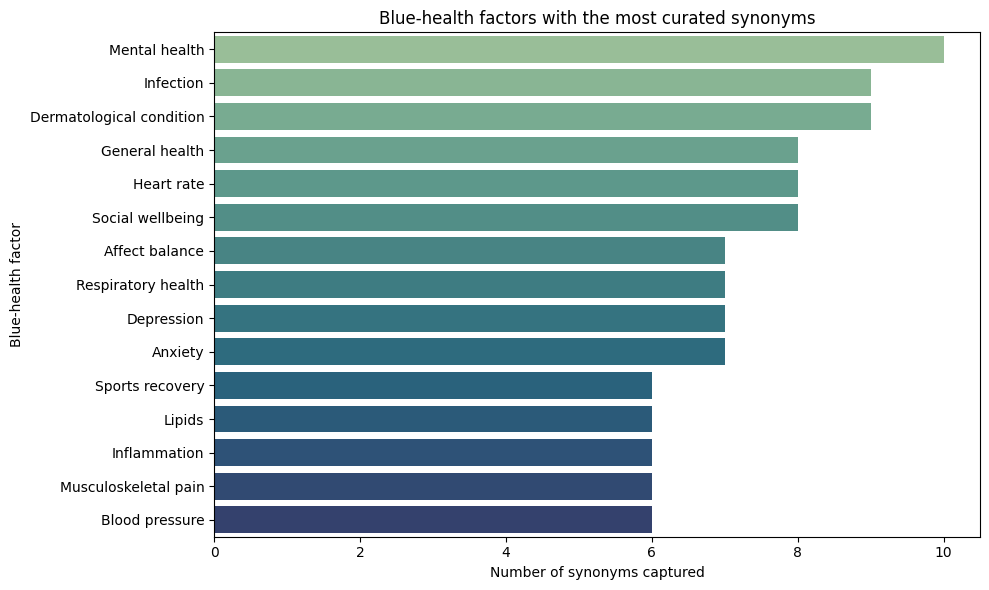

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(data=factor_synonyms.head(15), x='synonym_count', y='factor', palette='crest')
plt.title('Blue-health factors with the most curated synonyms')
plt.xlabel('Number of synonyms captured')
plt.ylabel('Blue-health factor')
plt.tight_layout()
plt.show()


## Marine exposure metrics and activity vocabularies

Next we review the complementary blue-health vocabularies that describe how people engage with or
are exposed to marine environments. Each entry mirrors the factor catalogue structure. The tables
below show the breadth of synonyms available for each activity and exposure metric.

In [6]:
activity_groups = load_term_groups(TERMS_DIR / 'blue_health_activities.txt')
exposure_groups = load_term_groups(TERMS_DIR / 'blue_health_exposure_metrics.txt')

activity_summary = pd.DataFrame({
    'activity': [group[0] for group in activity_groups],
    'synonym_count': [len(group) for group in activity_groups]
}).sort_values('synonym_count', ascending=False)

exposure_summary = pd.DataFrame({
    'exposure_metric': [group[0] for group in exposure_groups],
    'synonym_count': [len(group) for group in exposure_groups]
}).sort_values('synonym_count', ascending=False)

activity_summary.head(10), exposure_summary.head(10)


(                  activity  synonym_count
 0   contemplation of water              7
 20                 surfing              5
 6           beach clean-up              4
 1       sitting by the sea              4
 8              sea dipping              4
 26  motorized water sports              4
 5              rockpooling              4
 2   mindfulness by the sea              4
 3        coastal strolling              4
 15           shore angling              3,
                    exposure_metric  synonym_count
 14  occupational exposure (marine)             16
 10     chemical pollution (marine)             11
 6              water contact level             10
 7            bathing water quality              9
 13             seafood consumption              9
 8             harmful algal blooms              7
 9    marine microbes and parasites              6
 0                coastal residence              6
 3             street-view blueness              6
 5    visit freq

/var/folders/3k/x1gnksmn1n10tcwjbtrk7ch80000gn/T/ipykernel_26460/3394754150.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=activity_summary.head(10), x='synonym_count', y='activity', palette='flare')
/var/folders/3k/x1gnksmn1n10tcwjbtrk7ch80000gn/T/ipykernel_26460/3394754150.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=exposure_summary.head(10), x='synonym_count', y='exposure_metric', palette='mako')


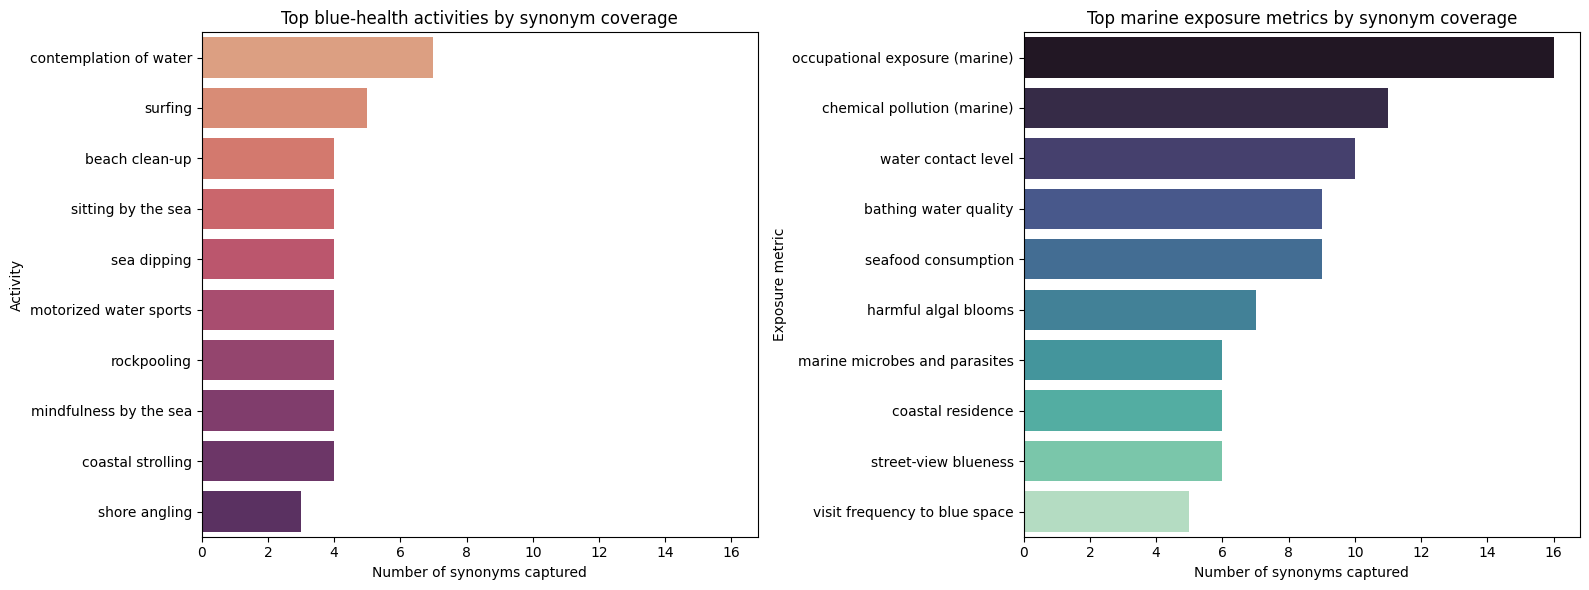

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

sns.barplot(ax=axes[0], data=activity_summary.head(10), x='synonym_count', y='activity', palette='flare')
axes[0].set_title('Top blue-health activities by synonym coverage')
axes[0].set_xlabel('Number of synonyms captured')
axes[0].set_ylabel('Activity')

sns.barplot(ax=axes[1], data=exposure_summary.head(10), x='synonym_count', y='exposure_metric', palette='mako')
axes[1].set_title('Top marine exposure metrics by synonym coverage')
axes[1].set_xlabel('Number of synonyms captured')
axes[1].set_ylabel('Exposure metric')

fig.tight_layout()
plt.show()


## Placeholder counts overview

The repository checks in placeholder outputs generated by `collect_counts.py` so collaborators can
prototype analyses without immediate PubMed access. We load the normalized activity score matrix and
preview both the matrix and the summary statistics produced by the pipeline.

In [8]:
scores_path = SUMMARY_DIR / 'blue_health_activity_scores.csv'
if not scores_path.exists():
    raise FileNotFoundError('Run scripts/collect_counts.py and scripts/counts_analysis.py to generate counts summaries.')

activity_scores = pd.read_csv(scores_path, index_col=0)
activity_scores.head()


,contemplation of water,sitting by the sea,mindfulness by the sea,coastal strolling,birdwatching (coastal),rockpooling,beach clean-up,wading,sea dipping,sunbathing (marine setting),...,open-water swimming (training),sea kayaking expedition,stand-up paddle downwinding,surfing,windsurfing,scuba diving (recreational),apnea,spearfishing (apnea-based),coastal rowing (competitive),motorized water sports
Mental health,0.000126,0.000005,0.000028,0.000042,0.0,0.000001,0.000000,0.000003,0.000001,0.0,...,0.000004,0.000003,0.000001,0.000076,0.000000,0.000028,0.004203,0.0,0.000000e+00,0.000031
Affect balance,0.000280,0.000008,0.000093,0.000047,0.0,0.000000,0.000016,0.000000,0.000008,0.0,...,0.000008,0.000000,0.000000,0.000093,0.000000,0.000054,0.004639,0.0,0.000000e+00,0.000124
Psychological distress,0.000144,0.000000,0.000080,0.000023,0.0,0.000000,0.000000,0.000006,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000046,0.000000,0.000034,0.004386,0.0,0.000000e+00,0.000006
Perceived stress,0.000173,0.000007,0.000206,0.000018,0.0,0.000011,0.000006,0.000008,0.000027,0.0,...,0.000009,0.000002,0.000000,0.000045,0.000008,0.000101,0.001888,0.0,8.756452e-07,0.000074
Anxiety,0.000167,0.000007,0.000051,0.000020,0.0,0.000000,0.000000,0.000000,0.000014,0.0,...,0.000014,0.000000,0.000000,0.000116,0.000000,0.000061,0.003302,0.0,0.000000e+00,0.000058


In [9]:
activity_scores.describe()


,contemplation of water,sitting by the sea,mindfulness by the sea,coastal strolling,birdwatching (coastal),rockpooling,beach clean-up,wading,sea dipping,sunbathing (marine setting),...,open-water swimming (training),sea kayaking expedition,stand-up paddle downwinding,surfing,windsurfing,scuba diving (recreational),apnea,spearfishing (apnea-based),coastal rowing (competitive),motorized water sports
count,59.000000,59.000000,59.000000,59.000000,5.900000e+01,59.000000,59.000000,59.000000,59.000000,59.0,...,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.0,5.900000e+01,59.000000
mean,0.000407,0.000010,0.000212,0.000069,2.927698e-07,0.000004,0.000159,0.000009,0.000020,0.0,...,0.000022,0.000007,0.000002,0.000107,0.000004,0.000383,0.006242,0.0,2.296642e-07,0.000109
std,0.000878,0.000019,0.000530,0.000196,1.726434e-06,0.000011,0.000776,0.000018,0.000082,0.0,...,0.000083,0.000030,0.000008,0.000231,0.000011,0.001926,0.026054,0.0,1.365592e-06,0.000227
min,0.000026,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000
25%,0.000097,0.000000,0.000029,0.000002,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000019,0.000000,0.000012,0.001019,0.0,0.000000e+00,0.000016
50%,0.000155,0.000003,0.000066,0.000018,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000004,0.000000,0.000000,0.000045,0.000000,0.000042,0.002103,0.0,0.000000e+00,0.000048
75%,0.000281,0.000011,0.000141,0.000039,0.000000e+00,0.000004,0.000005,0.000009,0.000009,0.0,...,0.000014,0.000003,0.000000,0.000091,0.000002,0.000102,0.003485,0.0,0.000000e+00,0.000088
max,0.004484,0.000100,0.003743,0.001121,1.309843e-05,0.000078,0.005605,0.000100,0.000601,0.0,...,0.000631,0.000227,0.000061,0.001643,0.000079,0.014688,0.201404,0.0,1.036173e-05,0.001418


### Top activities per factor

For each blue-health factor we extract the three activities with the highest normalized association
scores. The resulting table offers a quick glance at the most prominent activity pathways captured in
the placeholder dataset.

In [10]:
def top_associations(row, n=3):
    return row.sort_values(ascending=False).head(n)

top_activity_map = {
    factor: list(top_associations(activity_scores.loc[factor]).index)
    for factor in activity_scores.index
}

pd.DataFrame({
    'factor': list(top_activity_map.keys()),
    'top_activities': [', '.join(values) for values in top_activity_map.values()]
}).head(10)


,factor,top_activities
0,Mental health,"apnea, recreational kayaking (sit-on-top), con..."
1,Affect balance,"apnea, recreational kayaking (sit-on-top), con..."
2,Psychological distress,"apnea, recreational kayaking (sit-on-top), con..."
3,Perceived stress,"apnea, recreational kayaking (sit-on-top), min..."
4,Anxiety,"apnea, recreational kayaking (sit-on-top), con..."
5,Depression,"apnea, recreational kayaking (sit-on-top), con..."
6,Rumination,"apnea, recreational kayaking (sit-on-top), con..."
7,Post-traumatic stress,"apnea, recreational kayaking (sit-on-top), sur..."
8,Resilience,"contemplation of water, recreational kayaking ..."
9,Self-esteem,"apnea, recreational kayaking (sit-on-top), sur..."


### Activity → factor highlights

The counts analysis also records the reverse associations (activities pointing to factors). We load the
JSON summary and display a sample of entries.

In [11]:
with open(ASSOCS_PATH, 'r', encoding='utf-8') as handle:
    reverse_assocs = json.load(handle)

sample_reverse = pd.DataFrame({
    'activity': list(reverse_assocs.keys())[:10],
    'associated_factors': [', '.join(reverse_assocs[key][:3]) for key in list(reverse_assocs.keys())[:10]]
})
sample_reverse


,activity,associated_factors
0,contemplation of water,"Pro-environmental behavior, Attention restorat..."
1,sitting by the sea,"Thermoregulation, Physical activity, Mindfulness"
2,mindfulness by the sea,"Decompression sickness, Thermoregulation, Mind..."
3,coastal strolling,"Pro-environmental behavior, Attention restorat..."
4,birdwatching (coastal),"Work outcomes, Social wellbeing, Memory"
5,rockpooling,"Nature connectedness, Fertility, Memory"
6,beach clean-up,"Pro-environmental behavior, Place attachment, ..."
7,wading,"Thermoregulation, Awe, Gastrointestinal illness"
8,sea dipping,"Thermoregulation, Sports recovery, Fitness"
9,sunbathing (marine setting),"Self-transcendence, Attention restoration, Blo..."


## Conclusion

The curated blue-health catalogues cover a wide spectrum of wellbeing factors, exposure metrics, and
marine activities. The placeholder counts connect these vocabularies, highlighting key activity
pathways for priority factors and offering starting points for deeper analyses once full PubMed
collections are available.